<a href="https://colab.research.google.com/github/wbandabarragan/quantum-mechanics-1/blob/main/python-tools/python_for_QM02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 2: Python for Quantum Mechanics

# Black body radiation:

## Problem 1

1. Write python functions to compute the spectral radiance of a body for different frequencies, $\nu$, and different (absolute) temperatures, $T$, according to the Rayleigh-Jeans and the Planck laws.


2. Add a label indicating the UV side of the spectrum.


3. Now, make the plots of spectral radiance versus wavelength, also for both laws.


4. Repeat the plot adding markers to show the expectation values according to Wien's displacement law for a couple of temperature-wavelength pairs.

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cte

### Rayleigh-Jeans law (classical equation):

$$B_{\lambda}= \frac{2ck_BT}{\lambda^4} $$

In [ ]:
# CM law

def rayleigh(lb, tb):
  """
  This returns spectral radiances based on CM.
  Inputs: lb -> lambda (wavelength)
          tb -> temperature
  Output: bl -> spectral radiance
  """

  bl = (2*c*kb*tb)/(lb**4)

  return bl



In [ ]:
# Physical constants

c = cte.c # light speed
kb = cte.k # Boltzmann constant

#print(kb)


In [ ]:
# Vectors for wavelengths and temp

lb = np.arange(1.e-9, 5.e-6, 1.e-9) # in m

# Fix the temperature
tb = 5000. # in K

In [ ]:
# Get the CM spectral radiance

sr_cm = rayleigh(lb, tb)

print(lb.shape, sr_cm.shape)

(4999,) (4999,)


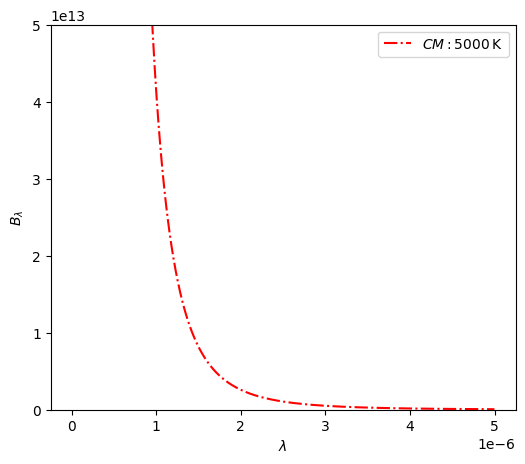

In [ ]:
# Plotting the CM law:

plt.figure(figsize=(6,5))

plt.plot(lb, sr_cm, color = "red", linestyle = "-.", label =r"$CM: 5000\,\rm K$")

plt.ylim(0, 5.e13)

plt.xlabel(r"$\lambda$")
plt.ylabel(r"$B_{\lambda}$")

plt.legend()

plt.show()



### Planck's law:

$$B_\lambda =\frac{2hc^2}{\lambda^5}\frac 1{ \exp\left(\frac{hc}{\lambda k_\mathrm B T}\right) - 1}$$

In [ ]:
# Physical constant

h = cte.h

print(h)

6.62607015e-34


In [ ]:
# QM law

def planck(lb, tb):
  """
  This returns spectral radiances based on QM.
  Inputs: lb -> lambda (wavelength)
          tb -> temperature
  Output: bl -> spectral radiance
  """

  bl = ((2*h*c**2)/(lb**5))*(1./(np.exp(h*c/(lb*kb*tb))- 1.))

  return bl

In [ ]:
# Get the QM spectral radiance

sr_qm = planck(lb, tb)

print(lb.shape, sr_cm.shape)

(4999,) (4999,)


<ipython-input-17-7802f07f6b64>:11: RuntimeWarning: overflow encountered in exp
  bl = ((2*h*c**2)/(lb**5))*(1./(np.exp(h*c/(lb*kb*tb))- 1.))


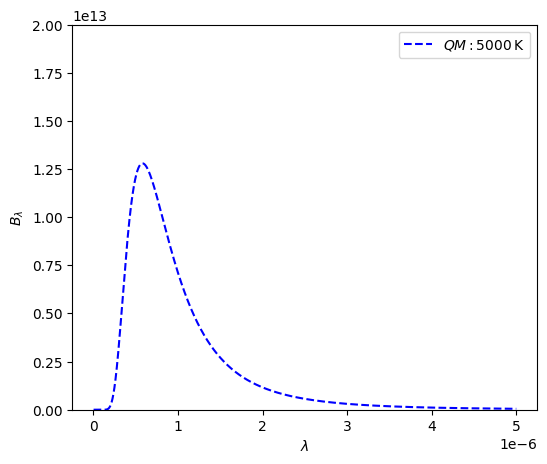

In [ ]:
# Plotting the QM law:

plt.figure(figsize=(6,5))

plt.plot(lb, sr_qm, color = "blue", linestyle = "--", label =r"$QM: 5000\,\rm K$")

plt.ylim(0, 2.e13)

plt.xlabel(r"$\lambda$")
plt.ylabel(r"$B_{\lambda}$")

plt.legend()

plt.show()

### Comparison between CM and QM:

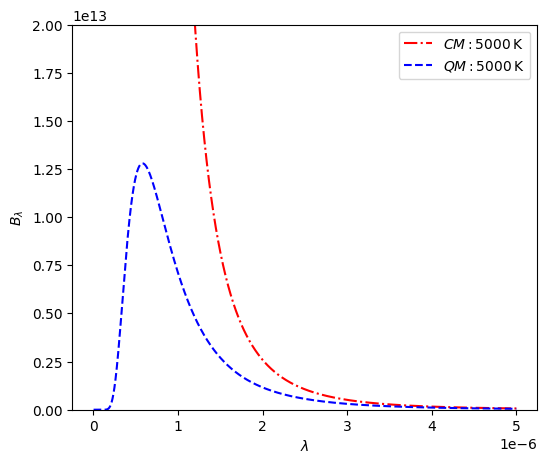

In [ ]:
# Plotting the QM law:

plt.figure(figsize=(6,5))

plt.plot(lb, sr_cm, color = "red", linestyle = "-.", label =r"$CM: 5000\,\rm K$")
plt.plot(lb, sr_qm, color = "blue", linestyle = "--", label =r"$QM: 5000\,\rm K$")

plt.ylim(0, 2.e13)

plt.xlabel(r"$\lambda$")
plt.ylabel(r"$B_{\lambda}$")

plt.legend()

plt.show()

# Wien's displacement:

$$\lambda_{\rm peak} = \frac{b}{T}$$

where: $b = 2.898\times 10^{-3}\,\rm K\,m$

In [ ]:
# Wiens function

def wien(tb):
  """
  This computes the peak wavelength for a given temperature.
  Input: tb -> temperature
  Output: l_peak
  """
  l_peak = b/tb

  return l_peak

In [ ]:
# Define Wien's constant

b = cte.Wien
print(b)

0.002897771955


In [ ]:
# Call the Wien function

l_peak = wien(tb)

print(l_peak)


# Use this lambda in Plancks law
beta_peak = planck(l_peak, tb)

print(beta_peak)

5.79554391e-07
12798983361978.945


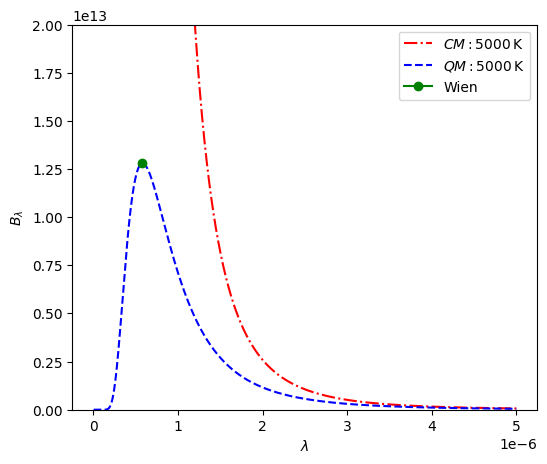

In [ ]:
# Plotting the QM law:

plt.figure(figsize=(6,5))

plt.plot(lb, sr_cm, color = "red", linestyle = "-.", label =r"$CM: 5000\,\rm K$")
plt.plot(lb, sr_qm, color = "blue", linestyle = "--", label =r"$QM: 5000\,\rm K$")
plt.plot(l_peak, beta_peak, marker = "o", color = "green", label ="Wien")

plt.ylim(0, 2.e13)

plt.xlabel(r"$\lambda$")
plt.ylabel(r"$B_{\lambda}$")

plt.legend()

plt.show()

## Problem 2 (statistical distributions):

Imagine a room containing fourteen people, whose ages are as follows: one person aged 14, one person aged 15, three people aged 16, two people aged 22, two people aged 24, five people aged 25.

(a) Compute $<j>^2$ and $<j^2>$.

(b) Compute the $\sigma_j=\sqrt{<j^2> - <j>^2}$

(c) Compute the standard deviation and compare with (b).

In [ ]:
# a) Generating the sample

sample = np.array([14, 15, 16, 16, 16, 22, 22, 24, 24, 25, 25, 25, 25, 25])

print(len(sample))

14


(array([1., 1., 3., 0., 0., 0., 0., 0., 2., 0., 2., 5.]),
 array([14.        , 14.91666667, 15.83333333, 16.75      , 17.66666667,
        18.58333333, 19.5       , 20.41666667, 21.33333333, 22.25      ,
        23.16666667, 24.08333333, 25.        ]),
 [<matplotlib.patches.Polygon at 0x782f469a1c60>])

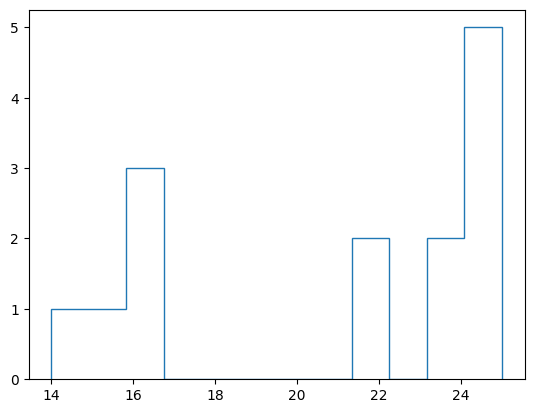

In [ ]:
# Distribution -> histogram

plt.hist(sample, bins = 12, histtype = "step")

### Average:

In [ ]:
av_sample = np.mean(sample)

print("The average age is: ", av_sample)

The average age is:  21.0


### Average of the square:

In [ ]:
# RMS:
sqrav_sample = np.mean(sample**2)

print("The average pof the squared ages is: ", sqrav_sample)

The average pof the squared ages is:  459.57142857142856


### Standard deviation with formula:

$\sigma_j=\sqrt{<j^2> - <j>^2}$

In [ ]:
# Get sigma from the formula:

sigma_sample_v1 = np.sqrt(sqrav_sample - av_sample**2)

print("Sigma from the formula is: ", sigma_sample_v1)


Sigma from the formula is:  4.309458036856672


### Standard deviation with Numpy:

In [ ]:
sigma_sample_v2 = np.std(sample)

print("Sigma from numpy is: ", sigma_sample_v2)

Sigma from numpy is:  4.3094580368566735


# Normal distro:

$$N(\mu, \sigma)$$

In [ ]:
mu_1 = 0 # mean
sigma_1 = 0.1 # std

n_1 = np.random.normal(mu_1, sigma_1, 10000)

print(n_1.shape)

(10000,)


(array([   4.,   21.,   30.,  111.,  241.,  464.,  750., 1129., 1434.,
        1505., 1446., 1167.,  797.,  461.,  256.,  120.,   46.,   12.,
           4.,    2.]),
 array([-0.36683564, -0.32835215, -0.28986866, -0.25138518, -0.21290169,
        -0.17441821, -0.13593472, -0.09745124, -0.05896775, -0.02048427,
         0.01799922,  0.0564827 ,  0.09496619,  0.13344968,  0.17193316,
         0.21041665,  0.24890013,  0.28738362,  0.3258671 ,  0.36435059,
         0.40283407]),
 [<matplotlib.patches.Polygon at 0x782f44790e80>])

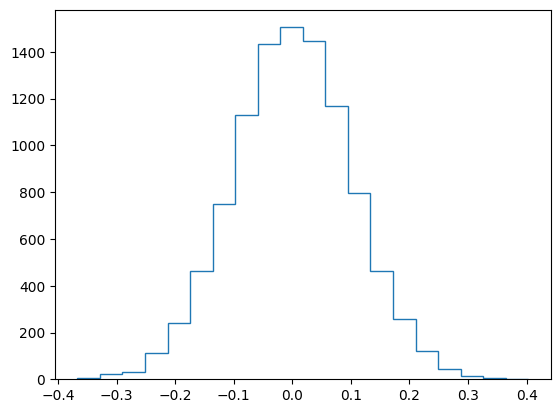

In [ ]:
# Distribution -> histogram

plt.hist(n_1, bins = 20, histtype = "step")

In [ ]:
av_n1 = np.mean(n_1)
st_n1 = np.std(n_1)

print("The average is: ", av_n1)
print("The std. dev. is: ", st_n1 )

The average is:  0.0002720741116564702
The std. dev. is:  0.09997816893717759
